<a href="https://colab.research.google.com/github/abigit240/NVIDIA_stock_analysis_and_prediction/blob/main/Copy_of_Data_analysis_NVDA_stocks_1999_to_date.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# @title 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# @title 2. Get the dataset (NVIDIA Stocks from 1999 to 2023)
path = 'https://raw.githubusercontent.com/abigit240/NVIDIA_stock_analysis_and_prediction/refs/heads/main/NVDA.csv'
data=pd.read_csv(path)

In [7]:
# @title 3. Explore Data
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


The NVDA.csv dataset contains stock market data with the following columns:

    Date: The date of the stock data.

    Adj Close: Adjusted closing price (dependent variable for prediction).

    Close: Closing price.

    High: Highest price of the day.

    Low: Lowest price of the day.

    Open: Opening price.

    Volume: Number of shares traded.

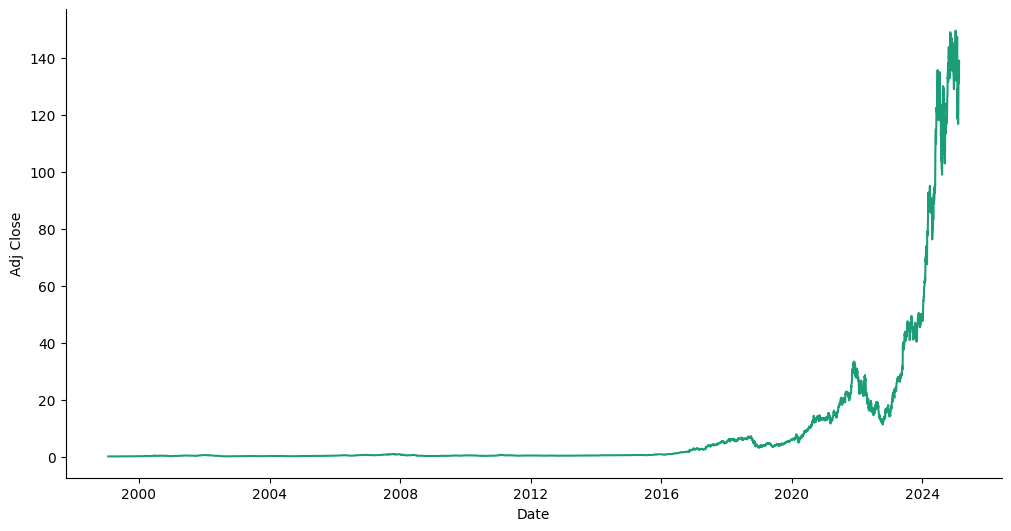

In [25]:
# @title Date vs Adj Close

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Adj Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Adj Close')

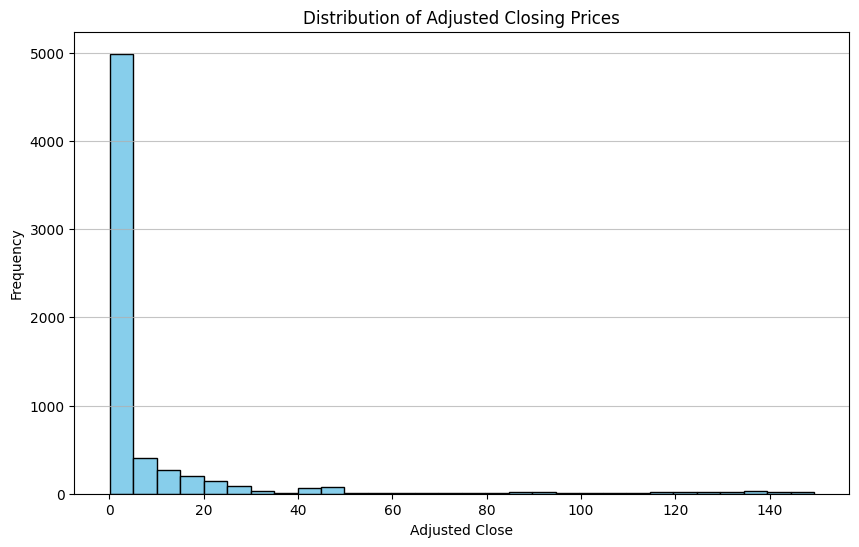

In [26]:
# @title Histogram of CSV (Adjclose values)
# prompt: Using dataframe data: histogram


# Assuming 'data' is your Pandas DataFrame
# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(data['Adj Close'], bins=30, color='skyblue', edgecolor='black')  # Adjust number of bins
plt.title('Distribution of Adjusted Closing Prices')
plt.xlabel('Adjusted Close')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


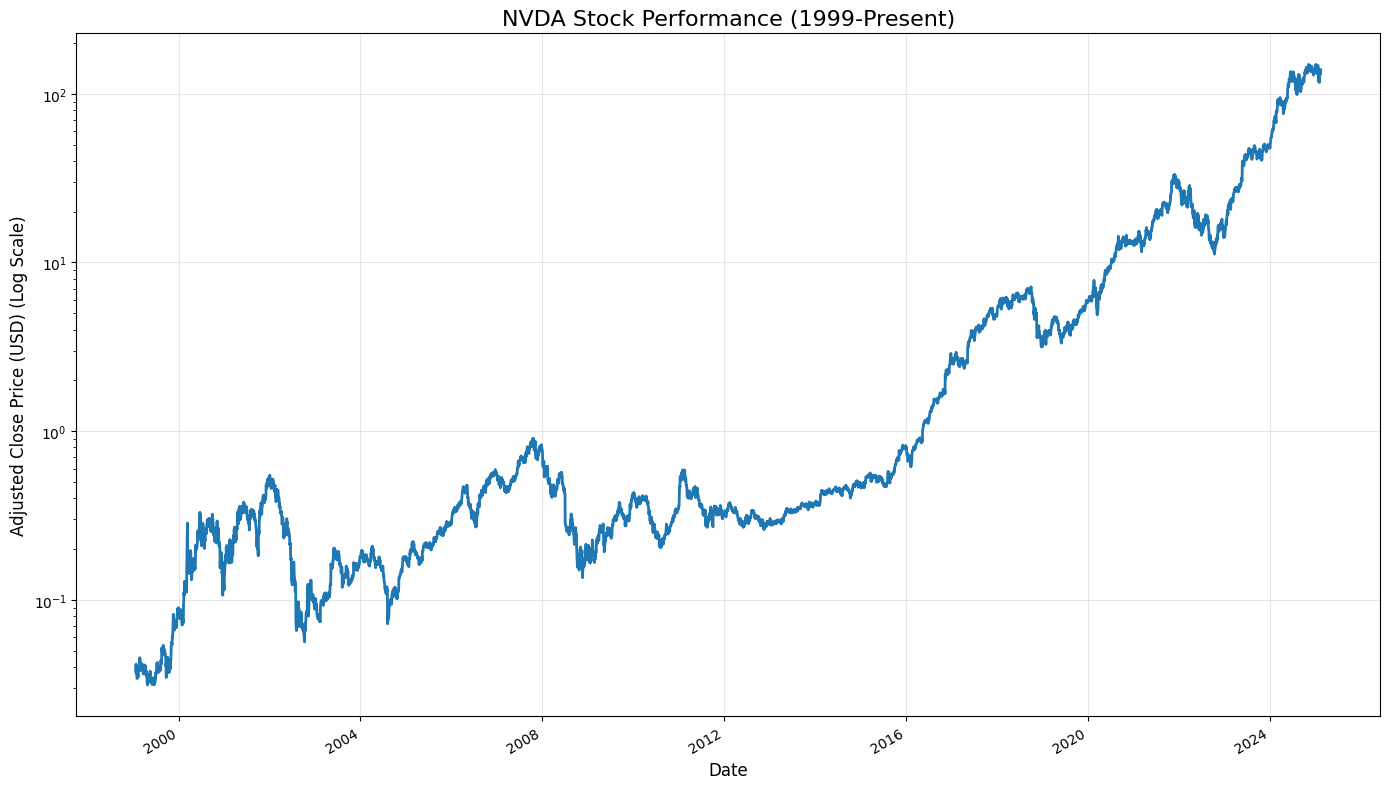

In [27]:
# @title NVDA Stock 1999 to date

# 'data' is your original Pandas DataFrame loaded from the CSV file
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime objects
data = data.sort_values('Date', ascending=True)

# Create a figure
plt.figure(figsize=(14, 8))

# Plot the data with a logarithmic y-axis scale
plt.plot(data['Date'], data['Adj Close'], linewidth=2)

# Formatting
plt.title('NVDA Stock Performance (1999-Present)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price (USD) (Log Scale)', fontsize=12)
plt.grid(True, alpha=0.3)

# Format x-axis to show years
plt.gcf().autofmt_xdate()

# Set y-axis to logarithmic scale
plt.yscale('log')  # Use log scale for y-axis

plt.tight_layout()
plt.show()

In [28]:
# @title Checking for missing data (null values)
data.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
Daily Return,1
MA_50,49
Volatility,50


In [29]:
# @title 4. Feature Engineering for Prediction
data['Daily Return'] = data['Adj Close'].pct_change()
data['MA_50'] = data['Adj Close'].rolling(window=50).mean()
data['Volatility'] = data['Daily Return'].rolling(window=50).std()
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Daily Return,MA_50,Volatility
0,1999-01-22,0.037615,0.041016,-0.365855,-0.366373,-0.365877,4.912057,NaN,NaN,NaN
1,1999-01-25,0.041556,0.045313,-0.365978,-0.366279,-0.365855,-0.205786,0.104764,NaN,NaN
2,1999-01-26,0.038331,0.041797,-0.365940,-0.366273,-0.365790,-0.594186,-0.077593,NaN,NaN
3,1999-01-27,0.038212,0.041667,-0.366095,-0.366340,-0.365953,-0.823659,-0.003111,NaN,NaN
4,1999-01-28,0.038092,0.041536,-0.366138,-0.366268,-0.365964,-0.862778,-0.003144,NaN,NaN


In [30]:
# @title Checking for missing data (null values)
data.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
Daily Return,1
MA_50,49
Volatility,50


In [31]:
# @title 5. Cleaning / Droping Null Rows of Data with new features
data.dropna()

,Date,Adj Close,Close,High,Low,Open,Volume,Daily Return,MA_50,Volatility
50,1999-04-06,0.037018,0.040365,-0.366138,-0.366340,-0.365959,-1.229222,-0.025142,0.039057,0.045735
51,1999-04-07,0.040122,0.043750,-0.366052,-0.366306,-0.366008,-1.183750,0.083860,0.039029,0.044852
52,1999-04-08,0.040839,0.044531,-0.365978,-0.366173,-0.365866,-1.088907,0.017851,0.039079,0.043480
53,1999-04-09,0.040122,0.043750,-0.366020,-0.366173,-0.365833,-1.278148,-0.017538,0.039117,0.043563
54,1999-04-12,0.038451,0.041927,-0.366084,-0.366273,-0.365899,-1.313700,-0.041668,0.039124,0.043993
...,...,...,...,...,...,...,...,...,...,...
6553,2025-02-10,133.570007,133.570007,5.176798,5.181686,5.070638,-0.887229,0.028728,135.174650,0.037864
6554,2025-02-11,132.800003,132.800003,5.155440,5.226952,5.174732,-0.975660,-0.005765,135.092439,0.037863
6555,2025-02-12,131.139999,131.139999,5.063440,5.144107,5.067712,-1.018902,-0.012500,135.008625,0.037869
6556,2025-02-13,135.289993,135.289993,5.238405,5.233357,5.132091,-0.932642,0.031646,134.949616,0.038013


In [32]:
# @title 6. Standardize to bring to similar scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Open', 'High', 'Low', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Volume']])

In [33]:
# @title Independant and Dependant Values
X = data[['Open', 'High', 'Low', 'Volume', 'Daily Return', 'MA_50']]
y = data['Adj Close']

In [34]:
# @title Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# @title Printing Train Test Shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (5246, 6)
Testing data shape: (1312, 6)


Mean Squared Error (MSE): 0.08509101623658341
R-squared (R2): 0.9998258820089665


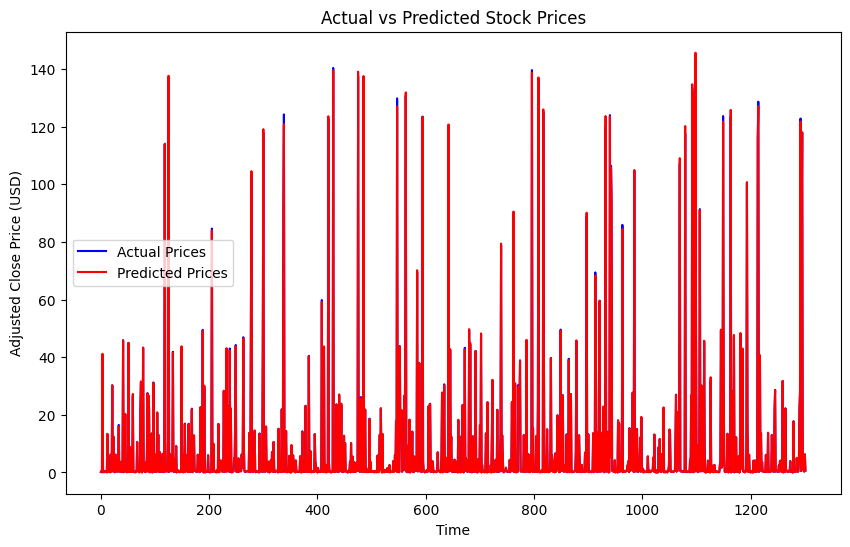

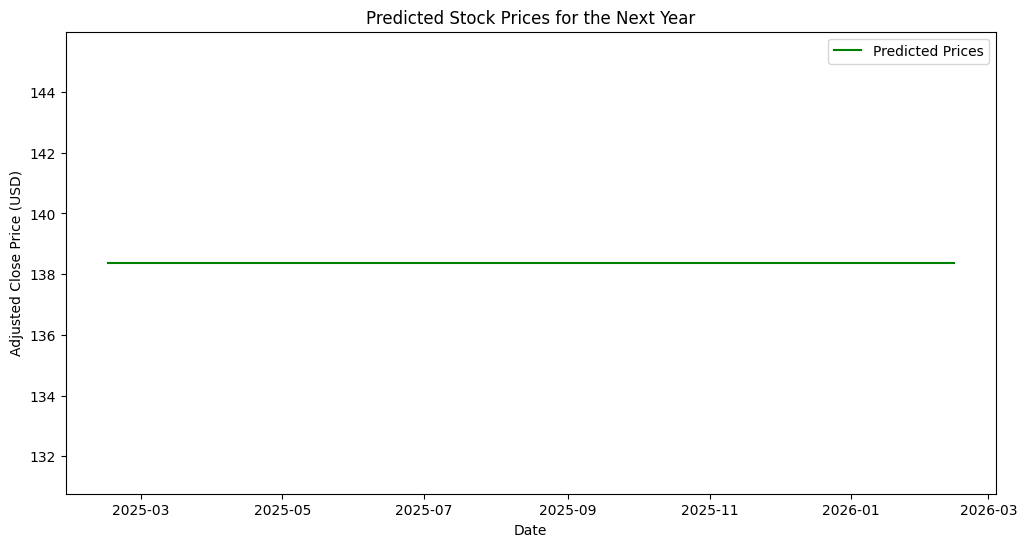

            Predicted Adj Close
2025-02-15           138.374906
2025-02-16           138.374906
2025-02-17           138.374906
2025-02-18           138.374906
2025-02-19           138.374906


In [36]:
# @title 7. Using Linear Regression Model for Future Prediction (1 year)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
path='https://raw.githubusercontent.com/abigit240/NVIDIA_stock_analysis_and_prediction/refs/heads/main/NVDA.csv'
df = pd.read_csv(path, parse_dates=['Date'])

# Handle missing values
df.dropna(inplace=True)

# Feature engineering
df['Daily Return'] = df['Adj Close'].pct_change()
df['MA_50'] = df['Adj Close'].rolling(window=50).mean()
df.dropna(inplace=True)  # Drop rows with NaN after feature engineering

# Independent and dependent variables
X = df[['Open', 'High', 'Low', 'Volume', 'Daily Return', 'MA_50']]
y = df['Adj Close']

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()

# Predict for the next year
# Step 1: Create a DataFrame for the next year's features
# (Assuming the last row in the dataset is the most recent data)
last_row = df.iloc[-1]
next_year_features = {
    'Open': last_row['Open'],
    'High': last_row['High'],
    'Low': last_row['Low'],
    'Volume': last_row['Volume'],
    'Daily Return': last_row['Daily Return'],
    'MA_50': last_row['MA_50']
}

# Step 2: Create a DataFrame for the next year (365 days)
next_year_dates = pd.date_range(start=df['Date'].max() + pd.Timedelta(days=1), periods=365, freq='D')
next_year_data = pd.DataFrame(index=next_year_dates)

# Step 3: Fill the DataFrame with the same features as the last row
for col in ['Open', 'High', 'Low', 'Volume', 'Daily Return', 'MA_50']:
    next_year_data[col] = next_year_features[col]

# Step 4: Scale the features
next_year_scaled = scaler.transform(next_year_data)

# Step 5: Predict the stock prices for the next year
next_year_predictions = model.predict(next_year_scaled)

# Step 6: Add predictions to the DataFrame
next_year_data['Predicted Adj Close'] = next_year_predictions

# Step 7: Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(next_year_data.index, next_year_data['Predicted Adj Close'], label='Predicted Prices', color='green')
plt.title('Predicted Stock Prices for the Next Year')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()

# Print the predicted prices for the next year
print(next_year_data[['Predicted Adj Close']].head())

Random Forest - Mean Squared Error (MSE): 0.12767552735872179
Random Forest - R-squared (R2): 0.9997387432033243


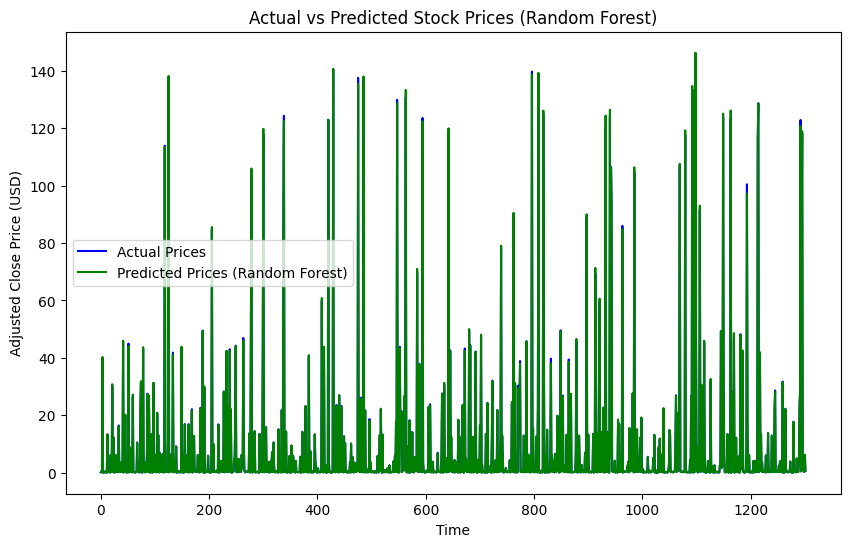

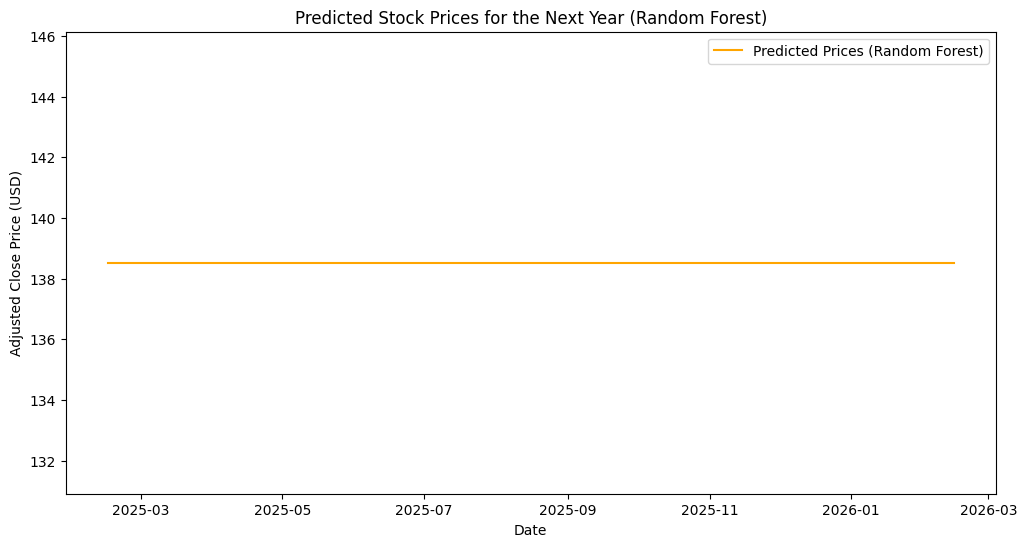

            Predicted Adj Close (RF)
2025-02-15                 138.52564
2025-02-16                 138.52564
2025-02-17                 138.52564
2025-02-18                 138.52564
2025-02-19                 138.52564


In [37]:
# @title 8. Random Forest for Prediction
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error, r2_score

# Load data
#path='/content/NVDA.csv'
#df = pd.read_csv(path, parse_dates=['Date'])

# Handle missing values
#df.dropna(inplace=True)

# Feature engineering
#df['Daily Return'] = df['Adj Close'].pct_change()
#df['MA_50'] = df['Adj Close'].rolling(window=50).mean()
#df.dropna(inplace=True)  # Drop rows with NaN after feature engineering

# Independent and dependent variables
#X = df[['Open', 'High', 'Low', 'Volume', 'Daily Return', 'MA_50']]
#y = df['Adj Close']

# Feature scaling
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Train-test split
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R2): {r2_rf}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred_rf, label='Predicted Prices (Random Forest)', color='green')
plt.title('Actual vs Predicted Stock Prices (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()

# Predict for the next year
# Step 1: Create a DataFrame for the next year's features
# (Assuming the last row in the dataset is the most recent data)
last_row = df.iloc[-1]
next_year_features = {
    'Open': last_row['Open'],
    'High': last_row['High'],
    'Low': last_row['Low'],
    'Volume': last_row['Volume'],
    'Daily Return': last_row['Daily Return'],
    'MA_50': last_row['MA_50']
}

# Step 2: Create a DataFrame for the next year (365 days)
next_year_dates = pd.date_range(start=df['Date'].max() + pd.Timedelta(days=1), periods=365, freq='D')
next_year_data = pd.DataFrame(index=next_year_dates)

# Step 3: Fill the DataFrame with the same features as the last row
for col in ['Open', 'High', 'Low', 'Volume', 'Daily Return', 'MA_50']:
    next_year_data[col] = next_year_features[col]

# Step 4: Scale the features
next_year_scaled = scaler.transform(next_year_data)

# Step 5: Predict the stock prices for the next year using Random Forest
next_year_predictions_rf = rf_model.predict(next_year_scaled)

# Step 6: Add predictions to the DataFrame
next_year_data['Predicted Adj Close (RF)'] = next_year_predictions_rf

# Step 7: Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(next_year_data.index, next_year_data['Predicted Adj Close (RF)'], label='Predicted Prices (Random Forest)', color='orange')
plt.title('Predicted Stock Prices for the Next Year (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()

# Print the predicted prices for the next year
print(next_year_data[['Predicted Adj Close (RF)']].head())

In [ ]:
# @title Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# @title Feature Importance
feature_importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Open: 0.18561721761769365
High: 0.26201447066192407
Low: 0.3103543436396722
Volume: 2.1808046063678678e-05
Daily Return: 6.332675948165412e-05
MA_50: 0.24192883327516496
